In [1]:
import mplfinance as mpf
import pandas as pd 
import yfinance as yf
import statistics as st

In [2]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "DIS",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "6mo",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
       group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
       threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  1 of 1 completed


In [3]:
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-10  157.979996  158.270004  154.649994  156.600006  156.600006   
2022-01-11  156.619995  158.220001  155.949997  157.889999  157.889999   
2022-01-12  158.500000  158.990005  156.330002  157.800003  157.800003   
2022-01-13  157.699997  158.529999  155.169998  155.440002  155.440002   
2022-01-14  152.350006  152.619995  148.419998  151.940002  151.940002   
...                ...         ...         ...         ...         ...   
2022-06-30   94.419998   95.440002   92.540001   94.400002   94.400002   
2022-07-01   94.239998   96.309998   93.980003   96.139999   96.139999   
2022-07-05   94.260002   97.230003   92.309998   97.180000   97.180000   
2022-07-06   97.529999   98.190002   95.400002   96.080002   96.080002   
2022-07-07   96.900002   97.529999   95.930000   97.430000   97.430000   

              Volume  
Date          

## Data Gather 

In [4]:
#df = yf.Ticker("BTC-USD").history(period = 'max')

In [5]:
#df = df.loc["2022-01-01":]

In [6]:
MeanC = st.mean(data['Close'])
print(MeanC)

125.60162626437055


In [7]:
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-10  157.979996  158.270004  154.649994  156.600006  156.600006   
2022-01-11  156.619995  158.220001  155.949997  157.889999  157.889999   
2022-01-12  158.500000  158.990005  156.330002  157.800003  157.800003   
2022-01-13  157.699997  158.529999  155.169998  155.440002  155.440002   
2022-01-14  152.350006  152.619995  148.419998  151.940002  151.940002   
...                ...         ...         ...         ...         ...   
2022-06-30   94.419998   95.440002   92.540001   94.400002   94.400002   
2022-07-01   94.239998   96.309998   93.980003   96.139999   96.139999   
2022-07-05   94.260002   97.230003   92.309998   97.180000   97.180000   
2022-07-06   97.529999   98.190002   95.400002   96.080002   96.080002   
2022-07-07   96.900002   97.529999   95.930000   97.430000   97.430000   

              Volume  
Date          

In [8]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

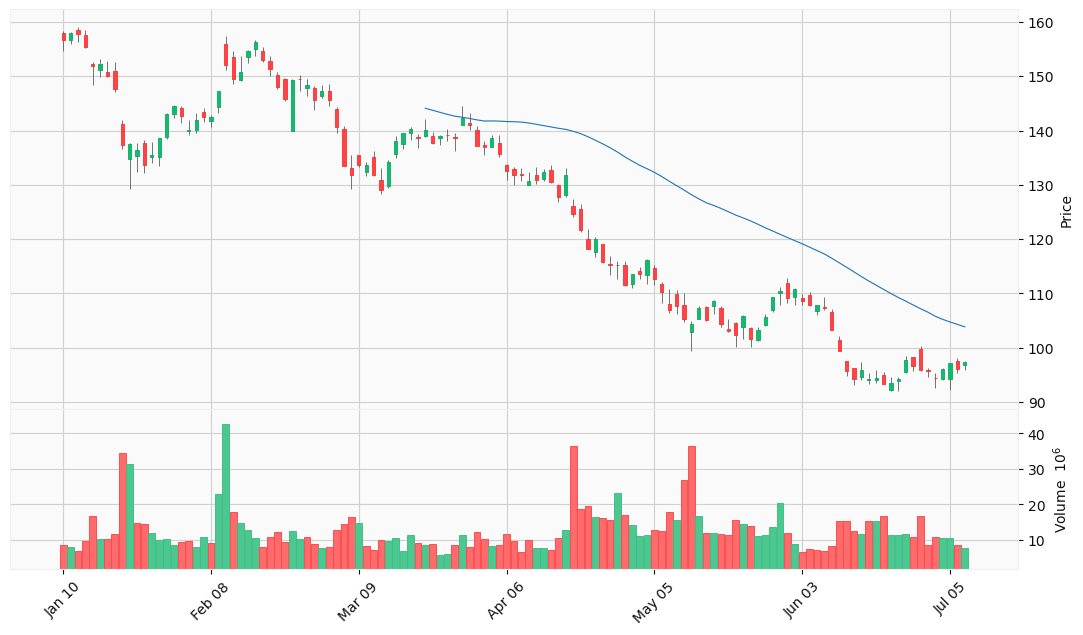

In [9]:
mpf.plot(data,type="candle", volume = True, style = 'yahoo',mav=50, figsize=(14,8))

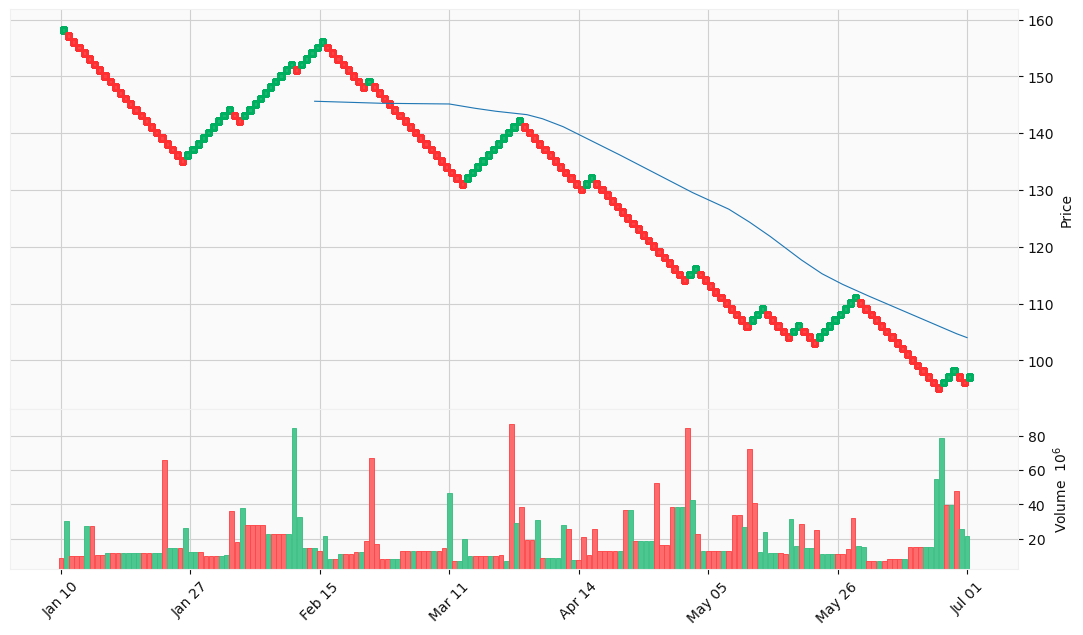

In [10]:
mpf.plot(data,type="renko", volume = True, style = 'yahoo',renko_params = dict(brick_size =1),mav=50, 
         figsize=(14,8))

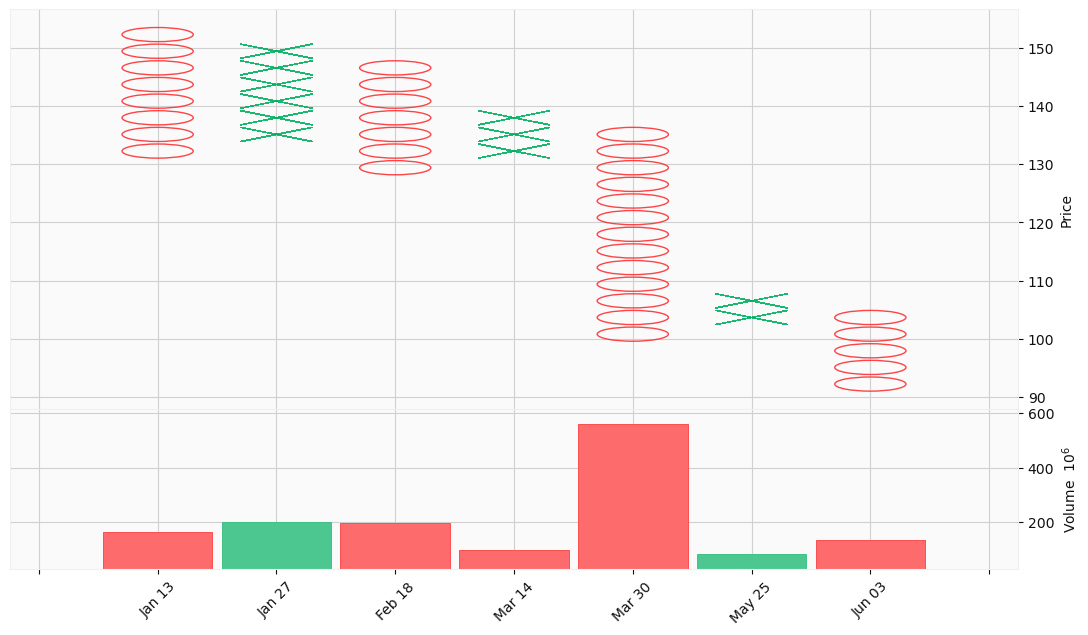

In [11]:
mpf.plot(data,type="pnf", volume = True, style = 'yahoo', figsize=(14,8))

In [12]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

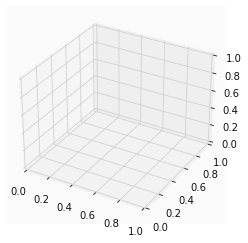

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [14]:
def countingSort(array):
    size=len(array)
    output=[0]*size

In [15]:
X = np.array(data['Close'])

In [22]:
counter = 0
for item in data['Close']:
 counter+=1
 print(counter)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123


In [28]:
data['date']=  list(i for i in range (1, len(data['Close'])+1))
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-10  157.979996  158.270004  154.649994  156.600006  156.600006   
2022-01-11  156.619995  158.220001  155.949997  157.889999  157.889999   
2022-01-12  158.500000  158.990005  156.330002  157.800003  157.800003   
2022-01-13  157.699997  158.529999  155.169998  155.440002  155.440002   
2022-01-14  152.350006  152.619995  148.419998  151.940002  151.940002   
...                ...         ...         ...         ...         ...   
2022-06-30   94.419998   95.440002   92.540001   94.400002   94.400002   
2022-07-01   94.239998   96.309998   93.980003   96.139999   96.139999   
2022-07-05   94.260002   97.230003   92.309998   97.180000   97.180000   
2022-07-06   97.529999   98.190002   95.400002   96.080002   96.080002   
2022-07-07   96.900002   97.529999   95.930000   97.430000   97.430000   

              Volume  date  
Date    

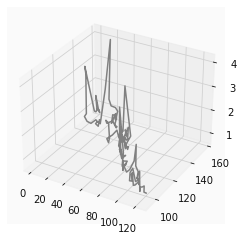

In [42]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline =  data['Volume']
xline = data['date']
yline = data['Close']
ax.plot3D(xline, yline, zline, 'gray')



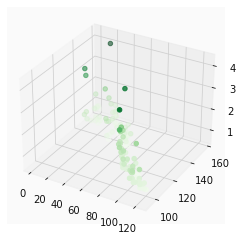

In [43]:
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
zdata = data['Volume']
xdata = data['date']
ydata = data['Close']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

In [46]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

TypeError: Input z must be 2D, not 1D

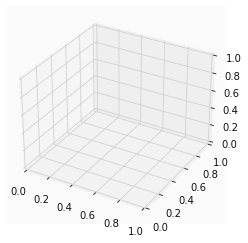

In [48]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

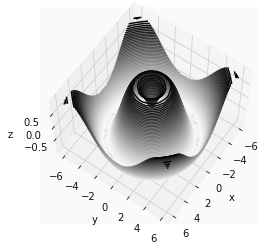

In [35]:
ax.view_init(60, 35)
fig

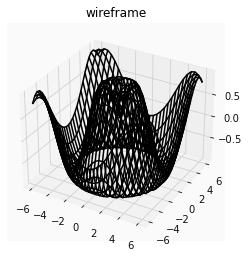

In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

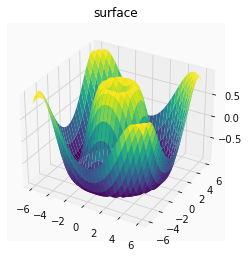

In [45]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

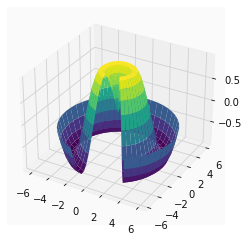

In [38]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');